In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
df.shape


(506, 14)

In [19]:
df.isnull().sum()

,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,5
Age,0
Distance,0
rad,0
tax,0


In [20]:
df['rm'].fillna(df['rm'].mean(), inplace=True)

# Verify that missing values are filled
print(df['rm'].isnull().sum())

0


<ipython-input-20-064a32f06d8c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


In [21]:
X= df.drop(columns=['medv'])
y = df['medv']

In [22]:
from sklearn.feature_selection import r_regression
corr_arr = (r_regression(X,y))
print(corr_arr)

[-0.38830461  0.36044534 -0.48372516  0.17526018 -0.42732077  0.69537485
 -0.37695457  0.24992873 -0.38162623 -0.46853593 -0.50778669  0.33346082
 -0.73766273]


In [23]:
df.columns

Index(['Crime_rate', 'zn', 'indus', 'chas', 'nox', 'rm', 'Age', 'Distance',
       'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [24]:
# Step 1: Compute the correlation of each feature with 'medv'
correlation_with_medv = df.corr()['medv']

# Step 2: Display the correlation with 'medv' for each feature
print(correlation_with_medv)

# Step 3: Set a threshold for low correlation. Let's say we consider features with correlation less than 0.1 as 'low'.
low_correlation_threshold = 0.3

# Step 4: Identify features that have an absolute correlation with 'medv' below the threshold
features_to_drop = correlation_with_medv[abs(correlation_with_medv) < low_correlation_threshold].index.tolist()


Crime_rate   -0.388305
zn            0.360445
indus        -0.483725
chas          0.175260
nox          -0.427321
rm            0.695375
Age          -0.376955
Distance      0.249929
rad          -0.381626
tax          -0.468536
ptratio      -0.507787
b             0.333461
lstat        -0.737663
medv          1.000000
Name: medv, dtype: float64


In [25]:
# Step 5: Drop those features from the DataFrame
new_df = df.drop(columns=features_to_drop)

# Display which features were dropped
print(f"Features dropped: {features_to_drop}")
print(f"Remaining features: {new_df.columns}")

Features dropped: ['chas', 'Distance']
Remaining features: Index(['Crime_rate', 'zn', 'indus', 'nox', 'rm', 'Age', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


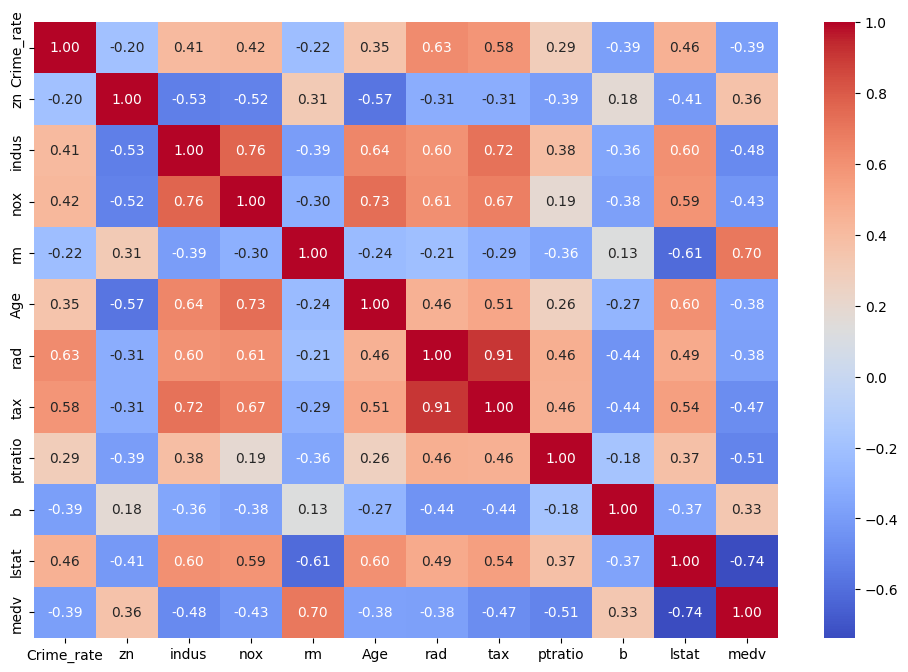

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix_filtered = new_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [27]:
from scipy.stats import zscore
new_df['mean_scores'] = df[[col for col in new_df.columns]].mean(axis=1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

In [29]:
outliers = []
new_df['z_score'] = zscore(new_df['mean_scores'])

In [30]:
outliers = new_df[abs(new_df['z_score']) > 2]
outliers
outliers.shape

(15, 14)

In [31]:
new_df = new_df[abs(new_df['z_score']) < 2]

In [32]:
new_df

,Crime_rate,zn,indus,nox,rm,Age,rad,tax,ptratio,b,lstat,medv,mean_scores,z_score
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.300933,-0.565071
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.234545,-0.842298
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.216584,-0.917298
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.163080,-1.140722
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.185052,-1.048971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.268766,-0.699394
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.281952,-0.644330
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.302535,-0.558378
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.293849,-0.594649


In [33]:
X = new_df.drop(new_df[['mean_scores','z_score','medv']],axis=1)
y = new_df['medv']

In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np
y_pred = lr1.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(r2)

Mean Absolute Error (MAE): 0.06933071410401899
Root Mean Squared Error (RMSE): 0.09349260619711901
0.7249036076338571
